In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)



Matplotlib is building the font cache; this may take a moment.


ModuleNotFoundError: No module named 'seaborn'

In [54]:

from math import sqrt

In [42]:
#Features Encoding
from sklearn.preprocessing import LabelEncoder

#Feature Selection
from sklearn.feature_selection import SelectFromModel

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

# to evaluate the models
from sklearn.metrics import mean_squared_error

In [4]:
df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Change the title of the columns, if necessary

In [6]:
columnlist = []
columnlist = df.columns
print(columnlist)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [7]:
df.rename(columns = {'customerID':'CustomerID','gender':'Gender', 'SeniorCitizen':'No. of Senior Citizens', 'Partner':'LifePartner', 'tenure':'Tenure'
                              }, inplace = True) 

In [8]:
df.head()

,CustomerID,Gender,No. of Senior Citizens,LifePartner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Check the datatypes of the columns, Change if necessary

In [9]:
df.dtypes

CustomerID                 object
Gender                     object
No. of Senior Citizens      int64
LifePartner                object
Dependents                 object
Tenure                      int64
PhoneService               object
MultipleLines              object
InternetService            object
OnlineSecurity             object
OnlineBackup               object
DeviceProtection           object
TechSupport                object
StreamingTV                object
StreamingMovies            object
Contract                   object
PaperlessBilling           object
PaymentMethod              object
MonthlyCharges            float64
TotalCharges               object
Churn                      object
dtype: object

## Convert columns from string to numerical

In [10]:
df['TotalCharges']=pd.to_numeric(df.TotalCharges, errors='coerce')

In [11]:
df.dtypes

CustomerID                 object
Gender                     object
No. of Senior Citizens      int64
LifePartner                object
Dependents                 object
Tenure                      int64
PhoneService               object
MultipleLines              object
InternetService            object
OnlineSecurity             object
OnlineBackup               object
DeviceProtection           object
TechSupport                object
StreamingTV                object
StreamingMovies            object
Contract                   object
PaperlessBilling           object
PaymentMethod              object
MonthlyCharges            float64
TotalCharges              float64
Churn                      object
dtype: object

In [12]:
df.describe()

,No. of Senior Citizens,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
## Remove unnecessary columns (e.g CustomerID)

In [61]:
df = df.drop(['CustomerID'], axis = 1)

KeyError: "['CustomerID'] not found in axis"

In [ ]:
df.shape


NameError: name 'save_fig' is not defined

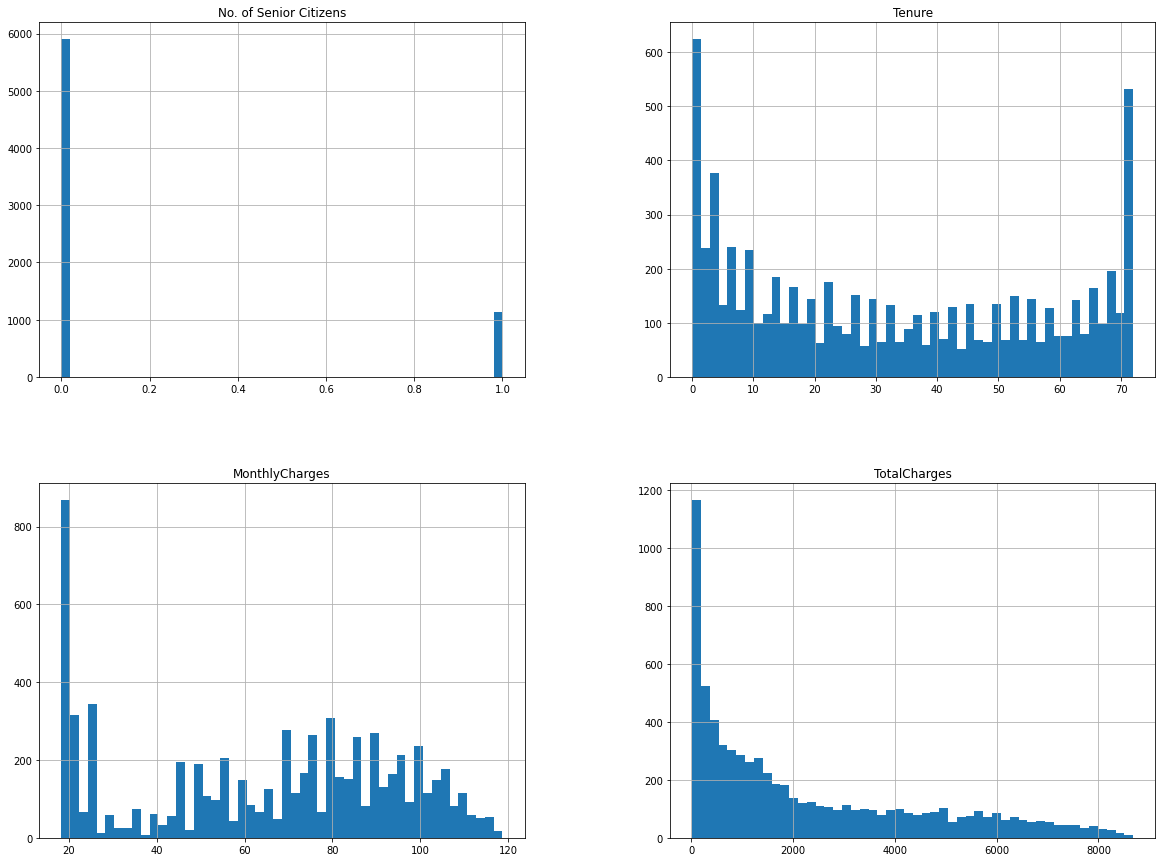

In [62]:
# Data Exploration - Let's explore 
%matplotlib inline
import matplotlib.pyplot as plt

try:
    # We select all rows and all columns after the 6th
    df.iloc[:,1:].hist(bins=50, figsize=(20,15))
    save_fig("attribute_histogram_plots")
    plt.show()
except AttributeError:
    pass

## Processing Numerical Variables

In [63]:
# make a list of the numerical variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum()>1 and df[var].dtypes!='O']

# print the variable nme and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(df[var].isnull().mean(), 3),  ' % missing values')

In [64]:
# replace the missing values
for var in vars_with_na:
    
    # calculate the mode
    mode_val = df[var].mode()[0]
    
    # train
    df[var+'_na'] = np.where(df[var].isnull(), 1, 0)
    df[var].fillna(mode_val, inplace=True)
    

# check that we have no more missing values in the engineered variables
df[vars_with_na].isnull().sum()    


Series([], dtype: float64)

In [65]:
df.head()

,Gender,No. of Senior Citizens,LifePartner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
#drop engineered variables
for var in vars_with_na:
    df = df.drop([var+'_na'], axis=1)


In [67]:
df.head()

,Gender,No. of Senior Citizens,LifePartner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Processing Categorical Variables

In [68]:
# make a list of the categorical variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum()>1 and df[var].dtypes=='O']

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(df[var].isnull().mean(), 3),  ' % missing values')

In [69]:
# function to replace NA in categorical variables
def fill_categorical_na(df, var_list):
    X = df.copy()
    X[var_list] = df[var_list].fillna('Missing')
    return X

In [70]:
# replace missing values with new label: "Missing"
df = fill_categorical_na(df, vars_with_na)


# check that we have no missing information in the engineered variables
df[vars_with_na].isnull().sum()

Series([], dtype: float64)

In [71]:
# check that test set does not contain null values in the engineered variables
[vr for var in vars_with_na if data[var].isnull().sum()>0]

[]

In [72]:
#drop engineered variables
for var in vars_with_na:
    df = df.drop([var+'_na'], axis=1)

### Remove Currency Symbols

In [27]:
# Uncomment code if necessary

# Importing regex
import re

# The price fields in our data frame
#price_list = ["price","cleaning_fee","security_deposit"]

# We change any blanks to 0 and use our regex function to remove anything that isn't a number (or negative number which is changed to 0)
#for col in price_list:
 #   df[col] = df[col].fillna("0")
  #  df[col] = df[col].apply(lambda x: float(re.compile('[^0-9eE.]').sub('', x)) if len(x)>0 else 0)

#df['host_since'] = pd.to_datetime(df['host_since'])

## Processing Geographic Variables

In [28]:
# Let's plot our cordinates which is a way of visualizing a map of the locations

#data.plot(kind="scatter", x="longitude", y="latitude")
#save_fig("visualization_plot")

In [29]:
# Let's narrow our visual map and remove locations outside the main area
#data_rem = data[(traval["longitude"]>151.16)&(data["latitude"]<-33.75)].reset_index(drop=True)

#data_rem = data_rem[data_rem["latitude"]>-33.95].reset_index(drop=True)

# And only look at locations under $600
#data_rem = data_rem[data_rem["price"]<600].reset_index(drop=True)

In [30]:
# Scatter plot with color heat map based on a specific parameter

#data_rem.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
  #  s=traval_co["number_of_reviews"]/2, label="Reviews", figsize=(10,7),
 #   c="price", cmap=plt.get_cmap("jet"), colorbar=True,
 #   sharex=False)
#plt.legend()
#save_fig("housing_prices_scatterplot")

## Processing Temporal Variables

In [31]:
## 

#L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
#df2 = df2.join(pd.concat((getattr(df2['InvoiceDate'].dt, i).rename(i) for i in L), axis=1))
#df2.head()

## Exploratory Data Analysis

## One Hot Encoding of Categorical Variables

### One hot encoding of independent variables (labels)

In [73]:
df.head(20)

,Gender,No. of Senior Citizens,LifePartner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [128]:
df_labels_encoded = pd.get_dummies(df, columns = [ 'Gender', 'LifePartner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'])

In [129]:
df_labels_encoded.head()

,No. of Senior Citizens,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,LifePartner_No,LifePartner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,No,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,Yes,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,No,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,Yes,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Label Encoding the Target Variable

In [130]:

label_encoder = LabelEncoder()
df_labels_encoded['Churn'] = label_encoder.fit_transform(df_labels_encoded['Churn'])

In [131]:
df_labels_encoded.head()

,No. of Senior Citizens,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,LifePartner_No,LifePartner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


### Replace spaces in column names with underscore

In [132]:
df_labels_encoded.columns = [c.replace(' ','_') for c in df_labels_encoded.columns]

In [133]:
df_labels_encoded.head()

,No._of_Senior_Citizens,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,LifePartner_No,LifePartner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [162]:
df_labels_encoded.columns

Index(['No._of_Senior_Citizens', 'Tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Gender_Female', 'Gender_Male', 'LifePartner_No',
       'LifePartner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No_phone_service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber_optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No_internet_service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No_internet_service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No_internet_service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No_internet_service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No_internet_service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One_year',
   

## Train/Test Split

In [134]:
df_labels_encoded.dtypes

No._of_Senior_Citizens                       int64
Tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int32
Gender_Female                                uint8
Gender_Male                                  uint8
LifePartner_No                               uint8
LifePartner_Yes                              uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No_phone_service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber_optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No              

In [135]:
# to divide train and test set
from sklearn.model_selection import train_test_split

In [136]:
Label='Churn'

X_train, X_test, y_train, y_test = train_test_split(df_labels_encoded, df_labels_encoded[Label],
                                                    test_size=0.1,
                                                    random_state=0) # we are setting the seed here
X_train.shape, X_test.shape

((6338, 46), (705, 46))

In [137]:
X_train.head()

,No._of_Senior_Citizens,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,LifePartner_No,LifePartner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
3637,0,9,20.25,178.50,1,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
6042,1,37,19.60,727.80,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
1824,0,72,20.30,1401.15,0,0,1,0,1,0,...,0,0,0,1,1,0,1,0,0,0
4121,1,27,95.55,2510.20,1,0,1,0,1,1,...,1,1,0,0,0,1,0,0,1,0
1425,0,12,74.15,741.40,0,0,1,0,1,1,...,1,1,0,0,0,1,0,0,1,0


In [138]:
X_train.drop('Churn', axis = 1)


,No._of_Senior_Citizens,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,LifePartner_No,LifePartner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
3637,0,9,20.25,178.50,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
6042,1,37,19.60,727.80,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
1824,0,72,20.30,1401.15,0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
4121,1,27,95.55,2510.20,0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
1425,0,12,74.15,741.40,0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0,15,103.45,1539.80,0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
3264,0,10,91.10,964.35,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1653,0,58,20.75,1185.95,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1
2607,1,1,69.75,69.75,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [139]:
y_train.head()

3637    1
6042    0
1824    0
4121    1
1425    0
Name: Churn, dtype: int32

In [140]:
bool_series = pd.isnull(X_train['TotalCharges'])

In [141]:
X_train[bool_series]

,No._of_Senior_Citizens,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,LifePartner_No,LifePartner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check


In [163]:
X_train.columns

Index(['No._of_Senior_Citizens', 'Tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Gender_Female', 'Gender_Male', 'LifePartner_No',
       'LifePartner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No_phone_service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber_optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No_internet_service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No_internet_service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No_internet_service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No_internet_service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No_internet_service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One_year',
   

## Select Features

In [142]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

Feature 0: 117.541114
Feature 1: 15474.710299
Feature 2: 3288.172884
Feature 3: 606870.529101
Feature 4: 4649.000000
Feature 5: 0.360925
Feature 6: 0.355499
Feature 7: 72.913735
Feature 8: 77.665364
Feature 9: 53.302938
Feature 10: 124.598073
Feature 11: 1.274338
Feature 12: 0.136449
Feature 13: 3.613126
Feature 14: 1.274338
Feature 15: 6.664145
Feature 16: 67.192566
Feature 17: 337.073705
Feature 18: 253.268444
Feature 19: 375.020347
Feature 20: 253.268444
Feature 21: 136.749314
Feature 22: 260.849381
Feature 23: 253.268444
Feature 24: 31.524594
Feature 25: 223.960483
Feature 26: 253.268444
Feature 27: 18.462066
Feature 28: 363.397553
Feature 29: 253.268444
Feature 30: 124.566497
Feature 31: 60.299975
Feature 32: 253.268444
Feature 33: 16.256437
Feature 34: 67.891284
Feature 35: 253.268444
Feature 36: 12.695857
Feature 37: 482.891061
Feature 38: 176.132228
Feature 39: 436.972161
Feature 40: 142.914311
Feature 41: 97.795469
Feature 42: 75.475430
Feature 43: 97.429241
Feature 44: 410.24

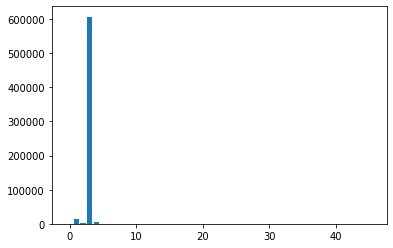

In [143]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [144]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

NameError: name 'select_features' is not defined

In [ ]:
fs 

In [ ]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
# Import the slearn utility to compare algorithms
from sklearn import model_selection

## Select Model

In [145]:

# Import all the algorithms we want to test
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier



In [146]:
 #Prepare an array with all the algorithms
models = []
models.append(('Support Vector Machines', svm.SVC()))
models.append(('KNeighbors Classifier', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier() ))
models.append(('SGD Classifier', SGDClassifier()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('AdaBoost Classifier', AdaBoostClassifier()))

In [147]:
# Prepare the configuration to run the test
seed = 7
results = []
names = []

cross_values_dict={}

#create dataframe
column_names = ["Algorithm", "Score", "Mean", "Std"]

#cross_values_df = pd.DataFrame({'Algorithm': [], 'Score': [], 'Mean': [],'Std':[]})
cross_values_df = pd.DataFrame(columns=column_names)

X = X_train
Y = y_train

In [148]:
cross_values_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Algorithm  0 non-null      object
 1   Score      0 non-null      object
 2   Mean       0 non-null      object
 3   Std        0 non-null      object
dtypes: object(4)
memory usage: 0.0+ bytes


In [149]:
# Import the slearn utility to compare algorithms
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

In [150]:
n_classes = Y.shape

In [151]:
n_classes[0]

6338

c:\users\pjjay\documents\mlcourse\envclass\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Support Vector Machines: accuracy: 0.733519 (0.019049)
Support Vector Machines: f1: 0.000000 (0.000000)


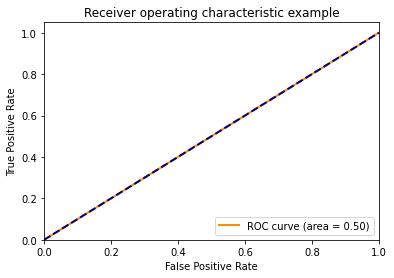

c:\users\pjjay\documents\mlcourse\envclass\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNeighbors Classifier: accuracy: 0.775643 (0.017304)
KNeighbors Classifier: f1: 0.532913 (0.027720)


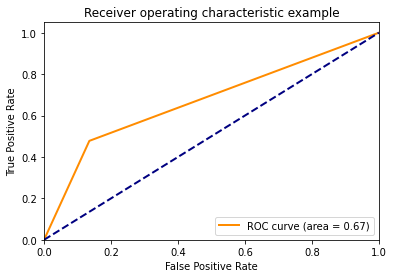

c:\users\pjjay\documents\mlcourse\envclass\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Decision Tree Classifier: accuracy: 1.000000 (0.000000)
Decision Tree Classifier: f1: 1.000000 (0.000000)


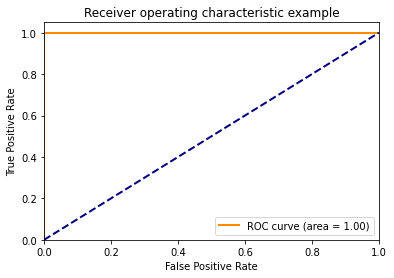

c:\users\pjjay\documents\mlcourse\envclass\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SGD Classifier: accuracy: 0.731800 (0.126354)
SGD Classifier: f1: 0.496239 (0.089779)


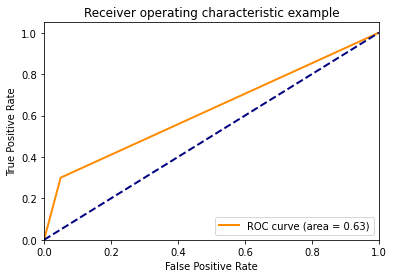

c:\users\pjjay\documents\mlcourse\envclass\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Random Forest Classifier: accuracy: 1.000000 (0.000000)
Random Forest Classifier: f1: 1.000000 (0.000000)


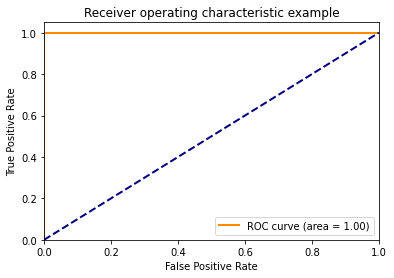

c:\users\pjjay\documents\mlcourse\envclass\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AdaBoost Classifier: accuracy: 1.000000 (0.000000)
AdaBoost Classifier: f1: 1.000000 (0.000000)


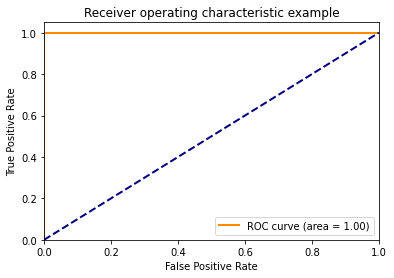

In [152]:
# Every algorithm is tested and results are
# collected and printed
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    #scoring = 'r2'
    
    for score in ["accuracy", "f1"]:
        cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring= score)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %s: %f (%f)"  %(
        name, score, cv_results.mean(), cv_results.std() )
        score_mean=cv_results.mean()
        score_std=cv_results.std()
        
        
        
        cross_values_dict.update({'Algorithm':name, 'Score':score, 'Mean': score_mean, 'Std':score_std  })
        cross_values_df = cross_values_df.append(cross_values_dict, ignore_index=True)
        print(msg)
        
    # Compute ROC curve and ROC area for each class
    
    # Learn to predict each class against the other
    classifier = OneVsRestClassifier(model)
    classifier.fit(X_train,y_train)
    y_score = classifier.predict(X_test)
  
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes[0]):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])   

    plt.figure()
    lw = 2
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
    

In [153]:
y_score

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [154]:
y_test

2200    0
4627    0
3225    0
2828    0
3768    0
       ..
3378    0
6920    0
6515    1
2213    0
4061    0
Name: Churn, Length: 705, dtype: int32

In [155]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   14.6s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [156]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=2, random_state=42)

In [157]:
dtreeclf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [158]:
dtreeclf.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=2, random_state=42)

In [159]:
import pickle
churn_pred_model = pickle.dumps(dtreeclf)

In [160]:
file_name='churn_predictor_model.pkl'
pickle.dump(dtreeclf, open(file_name, 'wb'))